### Подключение модулей

In [601]:
import pandas as pd
import numpy as np
import seaborn as sns

In [603]:
import matplotlib.pyplot as plt
%matplotlib inline

In [605]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [608]:
df = pd.read_csv('possum.csv')

In [610]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Данные содержат следующие столбцы:

case - случаи

site - место

Pop	- популяция

sex	- пол

age	- возраст

hdlngth	- длинна головы

skullw - ширина черепа

totlngth - общая длинна	

taill - хвост

footlgth - длинна ноги

earconch - размер уха

eye - глаз

chest - грудь

belly - живот

Мы будем использовать для обучения такие модели:
- LinearRegression(Линейная регрессия)
- KNeighborsRegressor(Регрессия ближайших соседей)
- DecisionTreeRegressor(Дерево решений регрессии)

In [615]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [619]:
df.duplicated().sum()  

0

In [620]:
# Проверка на пучтые значения
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [623]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [624]:
df['footlgth'].fillna(df['footlgth'].mean(), inplace=True)

In [627]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [628]:
df['Pop'].value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

In [631]:
df['Pop'] = df['Pop'].replace({'Vic': 1, 'other': 0})

In [633]:
df['sex'].value_counts()

sex
m    61
f    43
Name: count, dtype: int64

In [635]:
df['sex'] = df['sex'].replace({'m': 1, 'f': 0})

Мы переопределили данные из object в числовые значения, для того, чтобы проверить есть ли зависимости между ними и другими данными

<Axes: xlabel='hdlngth', ylabel='Density'>

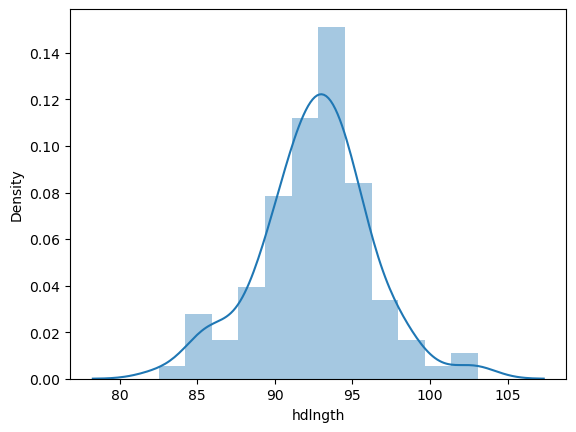

In [638]:
sns.distplot(df['hdlngth'])

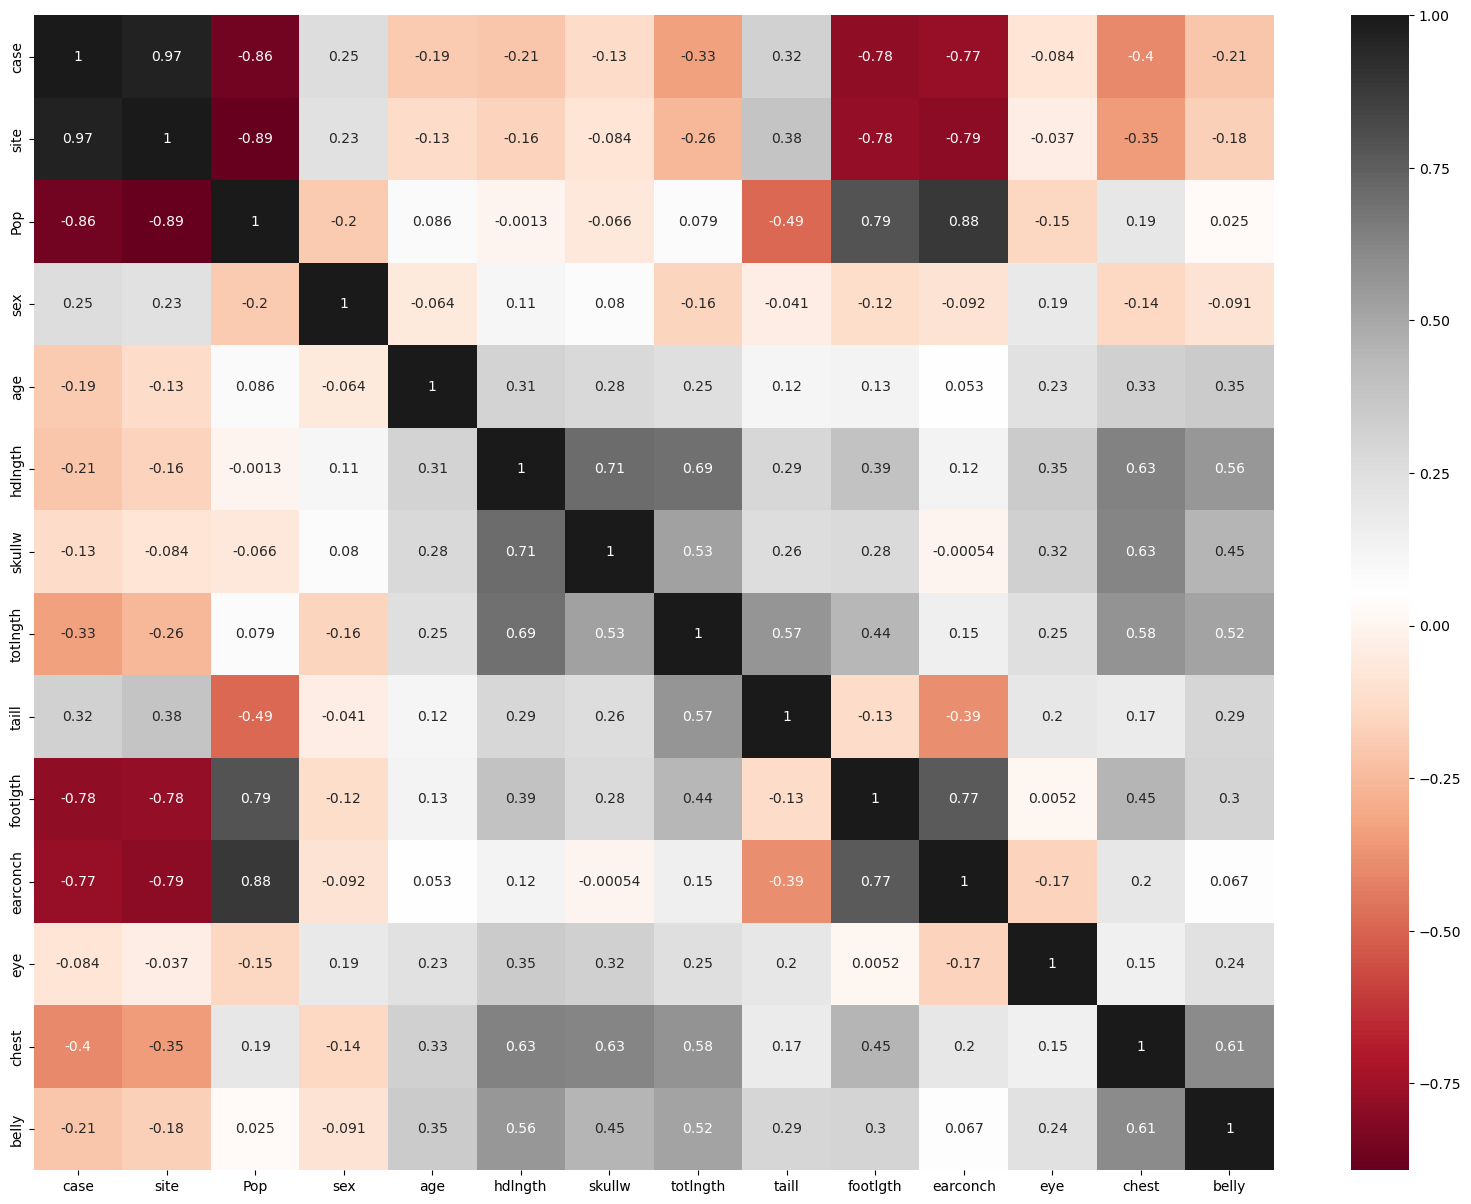

In [639]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap = 'RdGy',annot = True,cbar=True);

По тепловой карте и ранее по графикам, мы видими, что длинна головы имеет неплохие зависимости от размера черепа, груди, живота и длинны тела. Помимо этого есть зависимости между размером уха и ноги от популяции.

<Axes: xlabel='site', ylabel='hdlngth'>

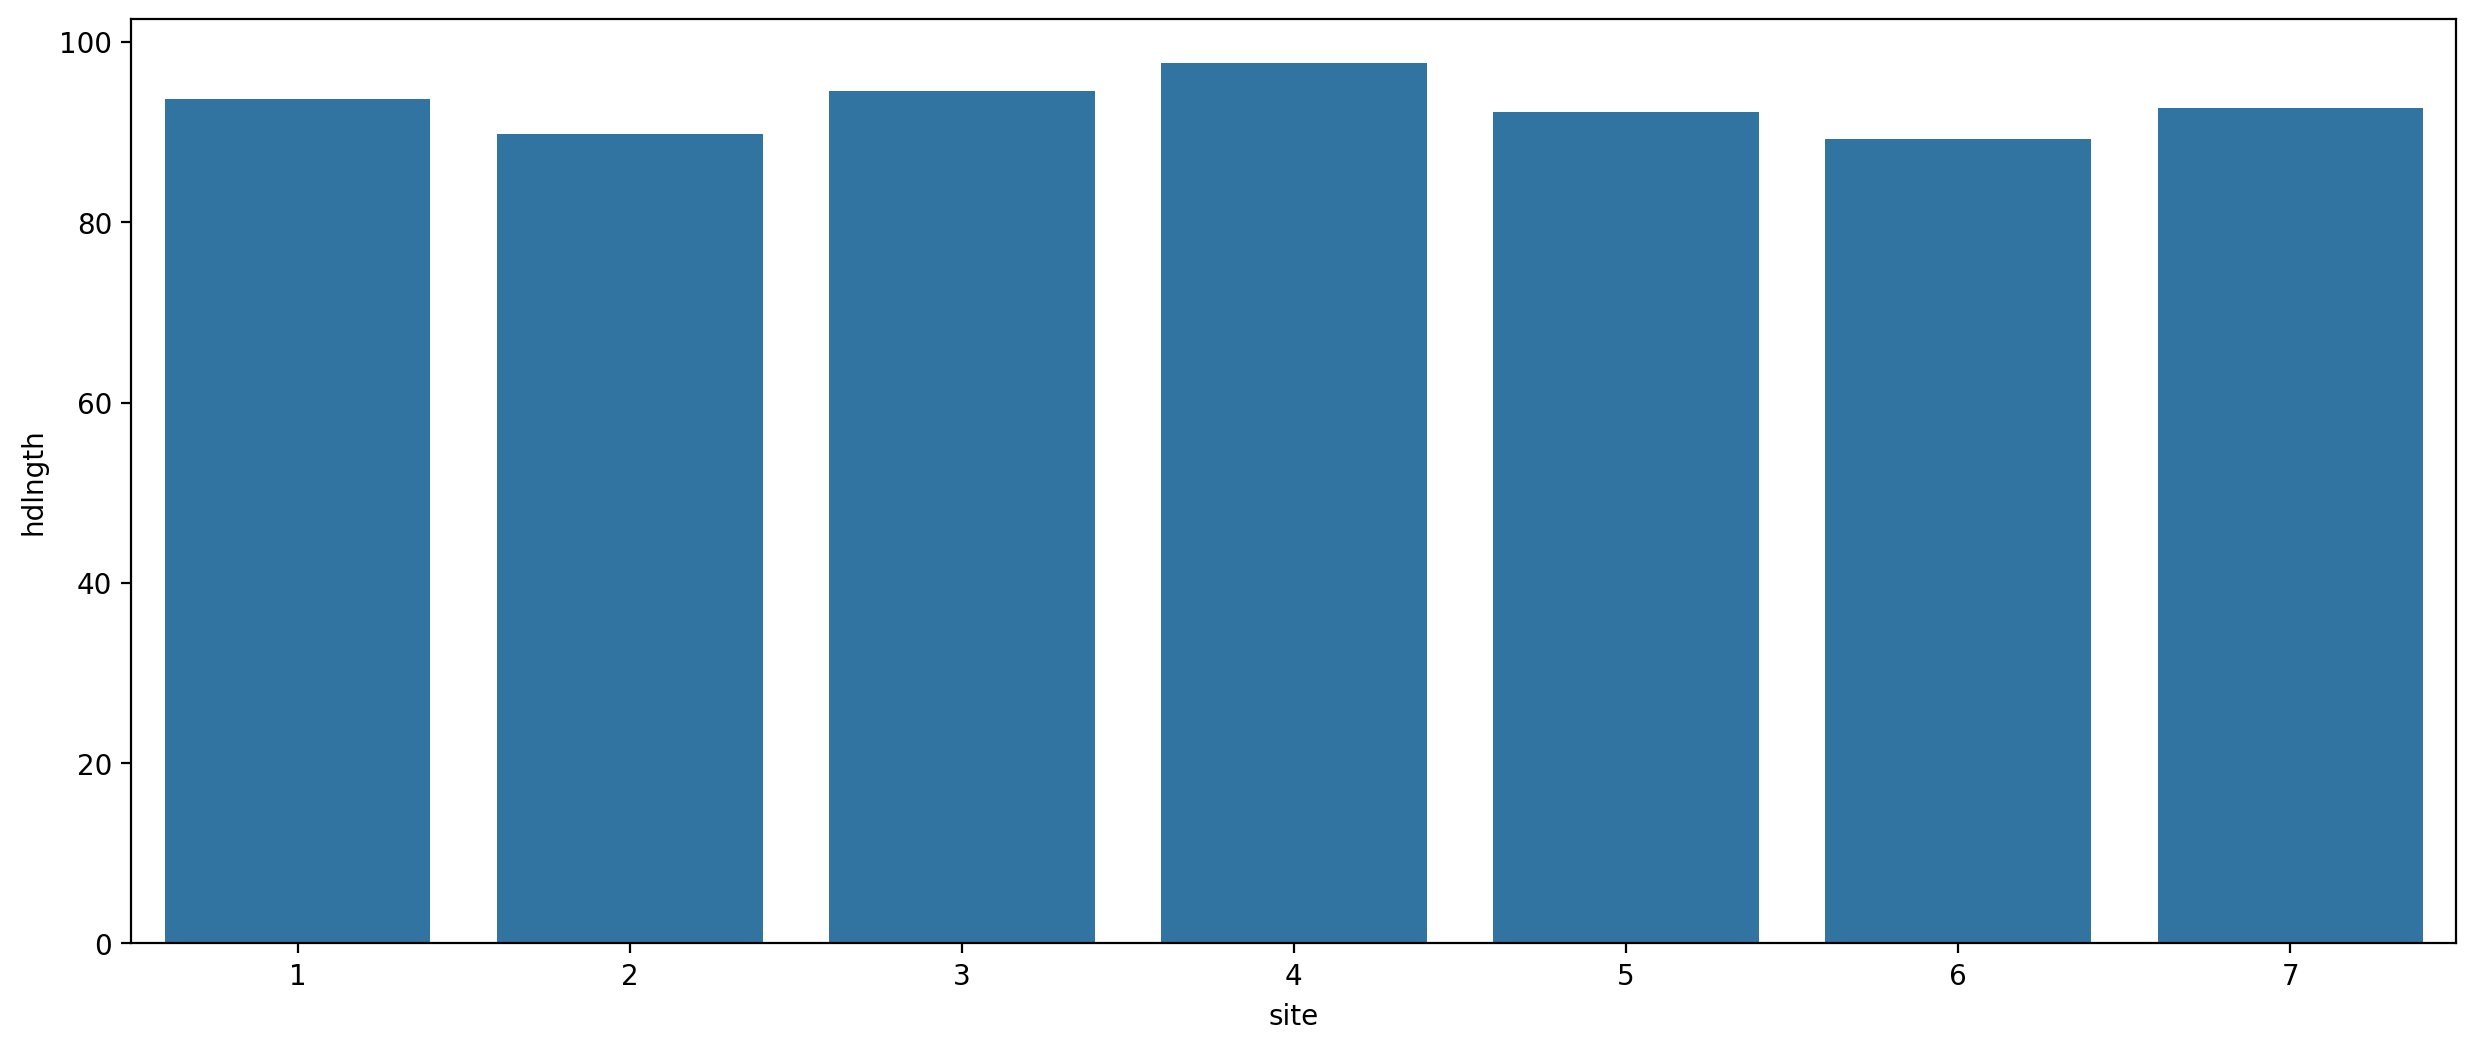

In [641]:
plt.figure(figsize = (15, 6), dpi = 200)
sns.barplot(x = 'site', y = 'hdlngth', data = df, ci = None)

Но в ходе различных переборов данных для обучения, мы пришли к выводу, что использование большого количества признаков ведёт к переобучению модели, возможно из-за небольшого кол-ва данных

### Обучение моделей

Для обучения были выбранны такие модели:
- LinearRegression(Линейная регрессия)
- KNeighborsRegressor(Регрессия ближайших соседей)
- DecisionTreeRegressor(Дерево решений регрессии)

Выбор именно их обусловлен тем, что они использовались в примере, а значит их использование проще

In [645]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [809]:
X = df[['site', 'sex', 'age', 'skullw', 'totlngth', 'footlgth']]

In [811]:
y = df['hdlngth']

In [813]:
from sklearn.model_selection import train_test_split

In [815]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [818]:
from sklearn.linear_model import LinearRegression

In [820]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [821]:
lrm.intercept_

26.12210930438397

In [824]:
lrm.coef_

array([0.06757969, 1.22380687, 0.14272514, 0.39619831, 0.37164916,
       0.14725493])

In [826]:
predictions = lrm.predict(X_test)

In [828]:
predictions

array([93.85270724, 90.26438846, 92.8491536 , 98.08097937, 91.5200653 ,
       92.31136883, 91.95500128, 94.74354783, 94.76743929, 96.53294273,
       93.29546219, 95.17472383, 92.70087791, 91.09745382, 87.48087607,
       91.01220764, 91.80260194, 92.37511057, 95.57710047, 90.01014764,
       90.97945963, 97.35054668, 92.78424918, 91.34022946, 90.68904626,
       88.69759167, 92.88293973, 89.2376624 , 90.48203675, 93.72851645,
       89.0606378 , 93.6818422 ])

In [830]:
y_test.round(3)

30    92.8
65    90.4
64    93.5
53    96.9
45    91.4
93    91.8
91    90.7
47    98.6
10    93.3
0     94.1
18    94.4
31    94.3
88    97.7
95    94.8
77    86.5
4     91.5
80    90.6
33    90.6
12    95.1
26    90.5
98    93.3
55    99.9
22    92.5
76    93.6
44    90.7
72    82.5
15    91.6
42    90.0
40    88.4
9     91.8
85    88.2
11    94.9
Name: hdlngth, dtype: float64

<Axes: xlabel='hdlngth', ylabel='Density'>

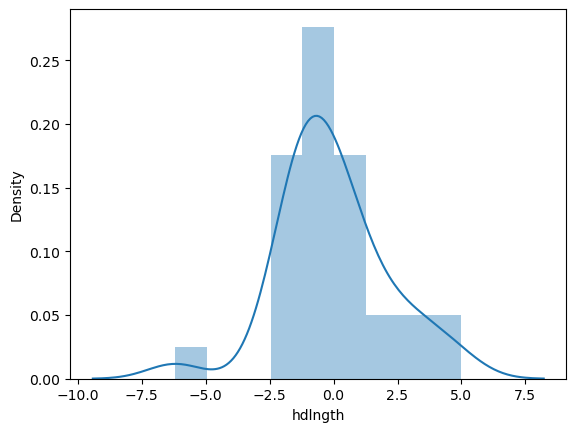

In [832]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии

In [834]:
from sklearn import metrics

In [835]:
metrics.mean_absolute_error(y_test, predictions)

1.578589461759039

In [836]:
metrics.mean_squared_error(y_test, predictions)

4.4587115068945335

In [837]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.1115661265739543

In [839]:
metrics.r2_score(y_test, predictions)

0.6170002740503062

### Модель KNeighborsRegressor

In [846]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [847]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [848]:
from sklearn.metrics import r2_score

pred_train1 = knn.predict(X_train)
pred_test1 = knn.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train1):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test1):.2f}')

Train R2 0.71
Test R2 0.58


### Модель DecisionTreeRegressor

In [850]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth=4, min_samples_split=5, min_samples_leaf=3, random_state=1)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                      random_state=1)

In [851]:
pred_train2 = tree_1.predict(X_train)
pred_test2 = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train2):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test2):.2f}')

Train R2 0.81
Test R2 0.48


Для лучшего анализа результатов, проведём нормализацию данных

### Нормализация данных

In [859]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [861]:
mms.transform(X_train)

array([[1.        , 0.        , 0.25      , 0.53225806, 0.65116279,
        0.40116279],
       [0.83333333, 1.        , 0.        , 0.        , 0.27906977,
        0.12209302],
       [0.        , 0.        , 0.25      , 0.32258065, 0.60465116,
        0.8255814 ],
       [0.83333333, 1.        , 0.        , 0.13978495, 0.41860465,
        0.09302326],
       [0.        , 0.        , 0.        , 0.25806452, 0.72093023,
        0.72674419],
       [0.66666667, 0.        , 0.625     , 0.34408602, 0.62790698,
        0.19767442],
       [0.5       , 0.        , 0.375     , 0.50537634, 0.8372093 ,
        0.37790698],
       [0.16666667, 0.        , 0.25      , 0.2688172 , 0.44186047,
        0.70348837],
       [0.16666667, 1.        , 0.75      , 0.5       , 0.60465116,
        0.79069767],
       [0.        , 0.        , 0.        , 0.9516129 , 0.6744186 ,
        0.72674419],
       [0.66666667, 1.        , 0.375     , 0.40860215, 0.46511628,
        0.23255814],
       [0.16666667, 1

In [863]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,site,sex,age,skullw,totlngth,footlgth
0,1.000000,0.0,0.250,0.532258,0.651163,0.401163
1,0.833333,1.0,0.000,0.000000,0.279070,0.122093
2,0.000000,0.0,0.250,0.322581,0.604651,0.825581
3,0.833333,1.0,0.000,0.139785,0.418605,0.093023
4,0.000000,0.0,0.000,0.258065,0.720930,0.726744
...,...,...,...,...,...,...
67,0.666667,1.0,0.000,0.129032,0.255814,0.075581
68,0.000000,1.0,0.500,0.408602,0.488372,0.523256
69,1.000000,1.0,0.250,0.215054,0.325581,0.180233
70,0.333333,1.0,0.625,0.591398,0.860465,0.418605


In [865]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,site,sex,age,skullw,totlngth,footlgth
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.390625,0.562500,0.389974,0.357023,0.543169,0.485573
std,0.400737,0.504016,0.247537,0.145151,0.173745,0.241737
min,0.000000,0.000000,0.000000,0.053763,0.279070,-0.023256
25%,0.000000,0.000000,0.250000,0.299731,0.418605,0.289244
50%,0.166667,1.000000,0.375000,0.330645,0.500000,0.511628
75%,0.833333,1.000000,0.500000,0.400538,0.674419,0.668605
max,1.000000,1.000000,1.000000,0.709677,0.883721,0.959302


In [867]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [869]:
pred_train3 = knn.predict(X_train_norm)
pred_test3 = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train3):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test3):.2f}')

Train R2 0.66
Test R2 0.64


In [871]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                      random_state=1)

In [873]:
pred_train4 = tree_1.predict(X_train_norm)
pred_test4 = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train4):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test4):.2f}')

Train R2 0.81
Test R2 0.48


In [875]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [877]:
pred_train5 = lrm.predict(X_train_norm)
pred_test5 = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train5):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test5):.2f}')

Train R2 0.70
Test R2 0.62


In [879]:
print(f'KNeighborsRegressor Train R2 {r2_score(y_train, pred_train3):.2f}')
print(f'KNeighborsRegressor Test R2 {r2_score(y_test, pred_test3):.2f}')
print()
print(f'DecisionTreeRegressor Train R2 {r2_score(y_train, pred_train4):.2f}')
print(f'DecisionTreeRegressor Test R2 {r2_score(y_test, pred_test4):.2f}')
print()
print(f'LinearRegression Train R2 {r2_score(y_train, pred_train5):.2f}')
print(f'LinearRegression Test R2 {r2_score(y_test, pred_test5):.2f}')

KNeighborsRegressor Train R2 0.66
KNeighborsRegressor Test R2 0.64

DecisionTreeRegressor Train R2 0.81
DecisionTreeRegressor Test R2 0.48

LinearRegression Train R2 0.70
LinearRegression Test R2 0.62


### Вывод

Мы проделали анализ данных и измененили датасет для комфортного обучения моделей регрессии, по результатам мы видим, что все модели показали одинаковый результат в тестовой части

Поэтому лучшей модели будет LinearRegression, ведь имеет более сбалансированные результаты, но все равно не показывает значительного улучшения на тестовой выборке. Другие же модели показывают возможное переобучение в тренировчной части.